In [2]:
import sys
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
FONTSIZE=20

In [3]:
# set plotting parameters
COLORS = {'a':'#117733', 
          'b':'#96CAA7',
          'lr':'#88CCEE',#882255
          'svm':'#CC6677',
          'optimal': '#D6BF4D',
          'feature_1':'#882255', #332288
          'people':'#882255', #AA4499',
          'stats':'#44AA99', 
          'feature_2':'#44AA99',
          'simple_grammar_constrained_noncompositonal':'#EF9EBB',
          'feature_3':'#E2C294', #'#0571D0', 
          'metal':'#DA9138', #"#D55E00", 
          'people2': '#748995',
          'metal2': '#173b4f'
          }
FONTSIZE=20

# Parameter changes of GCM and prototype model over blocks

(11, 8)


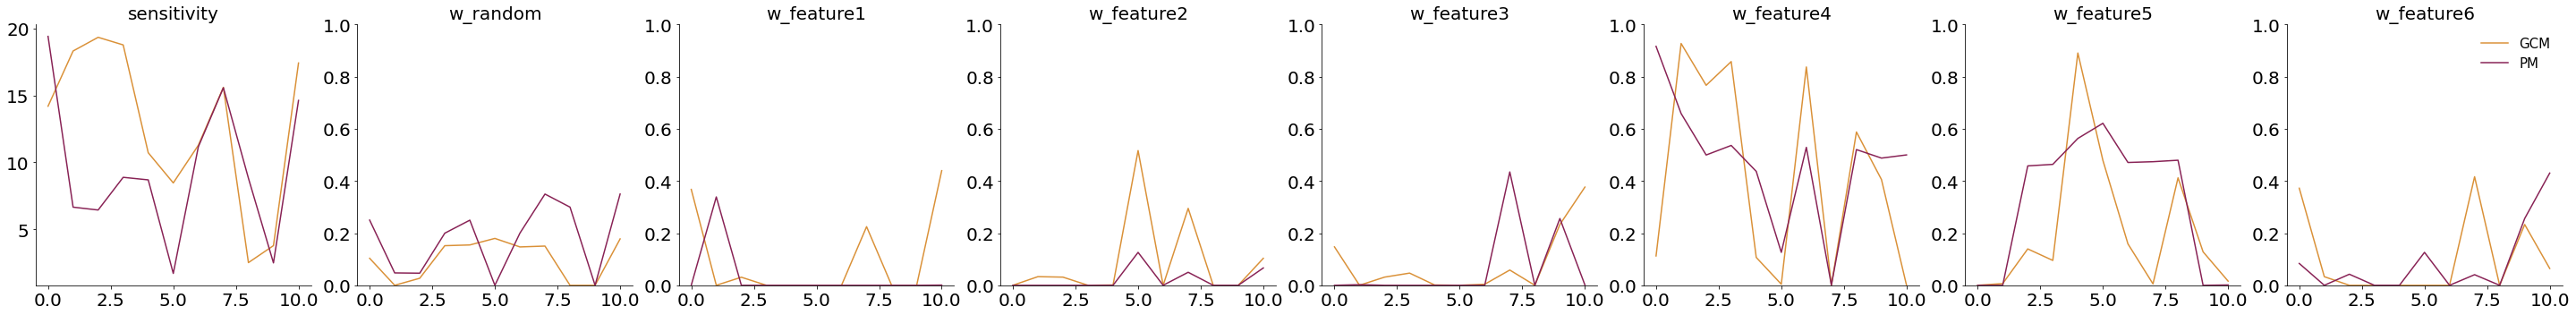

In [63]:
# load r2s=r2s, lls=lls, params=np.stack(params_list), opt_method=opt_method from gcm_humans
fits_gcm = np.load('../data/baselines/gcm_humans_devrajstask_runs=1_iters=1_blocks=11_tasks=1.npz')
fits_pm = np.load('../data/baselines/pm_humans_devrajstask_runs=1_iters=1_blocks=11_tasks=1.npz')

# store params
params_gcm = fits_gcm['params']
params_pm = fits_pm['params']

# names for params
param_names = ['sensitivity', 'w_random', 'w_feature1', 'w_feature2', 'w_feature3', 'w_feature4', 'w_feature5', 'w_feature6']
# plot changes in each parameter over blocks with shape of params_gcm being (60 participants, 11 blocks, 8 parameters)
params_gcm = params_gcm.squeeze()[10]#mean(axis=0)
params_pm = params_pm.squeeze()[10] #.mean(axis=0)
print(params_gcm.shape)
fig, ax = plt.subplots(1, params_gcm.shape[-1], figsize=(5*params_gcm.shape[-1], 5))
for i in range(params_gcm.shape[-1]):
    ax[i].plot(params_gcm[:, i].reshape(-1), color=COLORS['metal'])
    ax[i].plot(params_pm[:, i].reshape(-1), color=COLORS['people'])
    ax[i].set_title(param_names[i], fontsize=FONTSIZE)
    ax[i].tick_params(labelsize=FONTSIZE)
    if i>0:
        ax[i].set_ylim([0, 1])
    # add legned to lst plot, remvoe box
    if i == 7:
        ax[i].legend(['GCM', 'PM'], fontsize=FONTSIZE-5, frameon=False)
    sns.despine()
plt.tight_layout()
plt.savefig('../figures/params_over_blocks.pdf')
plt.show()



(array([7., 7., 6., 5., 7., 3., 4., 8., 7., 6.]),
 array([0.46266234, 0.5086039 , 0.55454545, 0.60048701, 0.64642857,
        0.69237013, 0.73831169, 0.78425325, 0.83019481, 0.87613636,
        0.92207792]),
 <BarContainer object of 10 artists>)

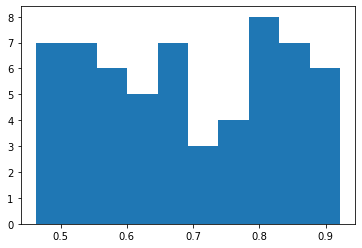

In [71]:
plt.hist(np.stack(accuracy).mean(1).reshape(-1))

# replicate model fits to devraj2022 task

In [6]:
new_df = pd.read_csv('../data/human/devraj2022rational.csv')
# keep only control conditions
new_df = new_df[new_df['condition']=='control']

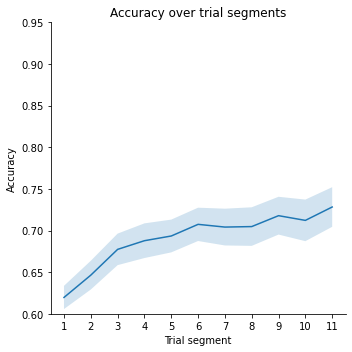

In [65]:

# plot accuracy of choice for each participant over trial segments using new dataframe
accuracy = []
for participant_id in new_df.participant.unique():
    new_df_participant = new_df[new_df.participant==participant_id]
    participant_acc = []
    for trial_segment in new_df_participant.trial_segment.unique():
        new_df_participant_trial_segment = new_df_participant[new_df_participant.trial_segment==trial_segment]
        participant_acc.append(np.sum(new_df_participant_trial_segment.choice.values==new_df_participant_trial_segment.correct_choice.values)/len(new_df_participant_trial_segment))
    accuracy.append(participant_acc)

# plot mean accuracy of participants over trial segments as line plot
f, ax = plt.subplots(1, 1, figsize=(5,5))
sns.lineplot(x=np.arange(11), y=np.mean(accuracy, axis=0), ax=ax)
# add standard error of mean as error bars
ax.fill_between(np.arange(11), np.mean(accuracy, axis=0)-np.std(accuracy, axis=0)/np.sqrt(len(accuracy)), np.mean(accuracy, axis=0)+np.std(accuracy, axis=0)/np.sqrt(len(accuracy)), alpha=0.2)
ax.set_xlabel('Trial segment')
ax.set_ylabel('Accuracy')
ax.set_xticks(np.arange(11))
ax.set_xticklabels(np.arange(11)+1)
ax.set_ylim([0.6, .95])
ax.set_title('Accuracy over trial segments')
sns.despine()
f.tight_layout()
plt.show()

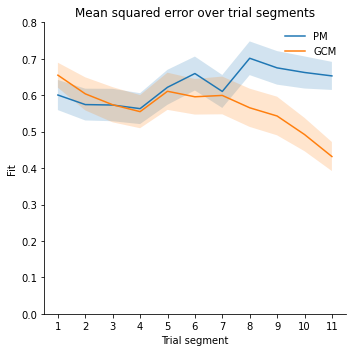

In [37]:
# load r2s=r2s, lls=lls, params=np.stack(params_list), opt_method=opt_method from gcm_humans
fits_gcm = np.load('../data/baselines/gcm_humans_devrajstask_runs=1_iters=1_blocks=11_tasks=1.npz')
fits_pm = np.load('../data/baselines/pm_humans_devrajstask_runs=1_iters=1_blocks=11_tasks=1.npz')
mses_gcm = fits_gcm['lls']
mses_pm = fits_pm['lls']
# mean mses across participants: mses are of shape (n_runs=1, n_participants, n_conditions=1, n_blocks)
mses_gcm = np.squeeze(mses_gcm)
mses_pm = np.squeeze(mses_pm)
# std error of mean across participants
stds_gcm = np.std(mses_gcm, axis=0)/np.sqrt(len(mses_gcm))
stds_pm = np.std(mses_pm, axis=0)/np.sqrt(len(mses_pm))
# plot mean mses across participants for each trial segment for both models
f, ax = plt.subplots(1, 1, figsize=(5,5))
sns.lineplot(x=np.arange(11)+1, y=np.mean(mses_pm, axis=0), ax=ax, label='PM')
sns.lineplot(x=np.arange(11)+1, y=np.mean(mses_gcm, axis=0), ax=ax, label='GCM')
# add standard error of mean as error bars
ax.fill_between(np.arange(11)+1, np.mean(mses_pm, axis=0)-stds_pm, np.mean(mses_pm, axis=0)+stds_pm, alpha=0.2)
ax.fill_between(np.arange(11)+1, np.mean(mses_gcm, axis=0)-stds_gcm, np.mean(mses_gcm, axis=0)+stds_gcm, alpha=0.2)
ax.set_xlabel('Trial segment')
ax.set_ylabel('Fit')
ax.set_ylim([0, .8])
ax.set_xticks(np.arange(11)+1)
ax.set_xticklabels(np.arange(11)+1)
# remove bounding box around the legend
ax.legend(frameon=False)
ax.set_title('Mean squared error over trial segments')
sns.despine()
f.tight_layout()
plt.show()


# Fitting GCM model to meta-learning models simulations on smiths task

## MSE-based approach

In [48]:
# load r2s=r2s, lls=lls, params=np.stack(params_list), opt_method=opt_method from gcm_humans
beta=0.1
fits_gcm = np.load(f'../data/meta_learner/gcm_metalearner_devrajstask_beta={beta}_runs=1_iters=1_blocks=11_tasks=1.npz')
fits_pm = np.load(f'../data/meta_learner/pm_metalearner_devrajstask_beta={beta}_runs=1_iters=1_blocks=11_tasks=1.npz')
mses_gcm = fits_gcm['lls']
mses_pm = fits_pm['lls']
# mean mses across participants: mses are of shape (n_runs=1, n_participants, n_conditions=1, n_blocks)
mses_gcm = np.squeeze(mses_gcm) #np.mean(mses_gcm, axis=0)
mses_pm = np.squeeze(mses_pm)
# std error of mean across participants
stds_gcm = np.std(mses_gcm, axis=0)/np.sqrt(len(mses_gcm))
stds_pm = np.std(mses_pm, axis=0)/np.sqrt(len(mses_pm))

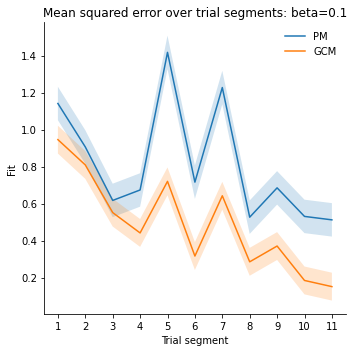

In [49]:
# plot mean mses across participants for each trial segment for both models
f, ax = plt.subplots(1, 1, figsize=(5,5))
sns.lineplot(x=np.arange(11)+1, y=mses_pm, ax=ax, label='PM')
sns.lineplot(x=np.arange(11)+1, y=mses_gcm, ax=ax, label='GCM')
# add standard error of mean as error bars
ax.fill_between(np.arange(11)+1, mses_pm-stds_pm, mses_pm+stds_pm, alpha=0.2)
ax.fill_between(np.arange(11)+1, mses_gcm-stds_gcm, mses_gcm+stds_gcm, alpha=0.2)
ax.set_xlabel('Trial segment')
ax.set_ylabel('Fit')
# ax.set_ylim([0, .8])
ax.set_xticks(np.arange(11)+1)
ax.set_xticklabels(np.arange(11)+1)
# remove bounding box around the legend
ax.legend(frameon=False)
ax.set_title(f'Mean squared error over trial segments: beta={beta}')
sns.despine()
f.tight_layout()
plt.show()


## NLLS based approach

In [ ]:
r2_gcm = np.load('../data/meta_learner/r2_gcm_smithstask.npy')
r2_pm = np.load('../data/meta_learner/r2_pm_smithstask.npy')

In [ ]:
def compare_categorisation_model_fits_learning(task_name = 'smithstask'):

    r2_gcm = np.load(f'../data/meta_learner/r2_gcm_{task_name}.npy')
    r2_pm = np.load(f'../data/meta_learner/r2_pm_{task_name}.npy')
    # r2_gcm = np.random.rand(2, 2, 6)
    # r2_pm = np.random.rand(2, 2, 6)
    num_blocks = r2_gcm.shape[-1]
    f, ax = plt.subplots(1, 1, figsize=(5,5))
    ax.plot(range(num_blocks), r2_gcm[:, 0].mean(0), label='gcm')
    ax.fill_between(range(num_blocks), r2_gcm[:, 0].mean(0) - r2_gcm[:, 0].std(0), r2_gcm[:, 0].mean(0) + r2_gcm[:, 0].std(0), alpha=0.3)
    ax.plot(range(num_blocks), r2_pm[:, 0].mean(0), label='prototype')
    ax.fill_between(range(num_blocks), r2_pm[:, 0].mean(0) - r2_pm[:, 0].std(0), r2_pm[:, 0].mean(0) + r2_pm[:, 0].std(0), alpha=0.3)
    ax.set_xlabel('Block', fontsize=FONTSIZE)
    ax.set_ylabel('pseudo-R$^2$', fontsize=FONTSIZE)
    plt.xticks(fontsize=FONTSIZE-2)
    plt.yticks(fontsize=FONTSIZE-2)
    plt.legend(fontsize=FONTSIZE-4, frameon=False,  loc="upper center", bbox_to_anchor=(.45, 1.2), ncol=2)  # place legend outside the plot
    sns.despine()
    f.tight_layout()
    plt.show()      
    # f.savefig(f'{SYS_PATH}/categorisation/figures/fit_gcm_pm_learningtrials_{task_name}.svg', bbox_inches='tight', dpi=300)

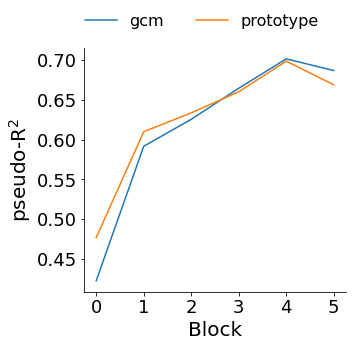

In [ ]:
compare_categorisation_model_fits_learning()

# Shepards task

## NLLS based approach

In [58]:
r2_gcm = np.load('../data/meta_learner/r2_gcm_smithstask.npy')
r2_pm = np.load('../data/meta_learner/r2_pm_smithstask.npy')

In [62]:
def compare_categorisation_model_fits_learning(task_name = 'smithstask'):

    r2_gcm = np.load(f'../data/meta_learner/r2_gcm_{task_name}.npy')
    r2_pm = np.load(f'../data/meta_learner/r2_pm_{task_name}.npy')
    # r2_gcm = np.random.rand(2, 2, 6)
    # r2_pm = np.random.rand(2, 2, 6)
    num_blocks = r2_gcm.shape[-1]
    f, ax = plt.subplots(1, 1, figsize=(5,5))
    ax.plot(range(num_blocks), r2_gcm[:, 0].mean(0), label='gcm')
    ax.fill_between(range(num_blocks), r2_gcm[:, 0].mean(0) - r2_gcm[:, 0].std(0), r2_gcm[:, 0].mean(0) + r2_gcm[:, 0].std(0), alpha=0.3)
    ax.plot(range(num_blocks), r2_pm[:, 0].mean(0), label='prototype')
    ax.fill_between(range(num_blocks), r2_pm[:, 0].mean(0) - r2_pm[:, 0].std(0), r2_pm[:, 0].mean(0) + r2_pm[:, 0].std(0), alpha=0.3)
    ax.set_xlabel('Block', fontsize=FONTSIZE)
    ax.set_ylabel('pseudo-R$^2$', fontsize=FONTSIZE)
    plt.xticks(fontsize=FONTSIZE-2)
    plt.yticks(fontsize=FONTSIZE-2)
    plt.legend(fontsize=FONTSIZE-4, frameon=False,  loc="upper center", bbox_to_anchor=(.45, 1.2), ncol=2)  # place legend outside the plot
    sns.despine()
    f.tight_layout()
    plt.show()      
    # f.savefig(f'{SYS_PATH}/categorisation/figures/fit_gcm_pm_learningtrials_{task_name}.svg', bbox_inches='tight', dpi=300)

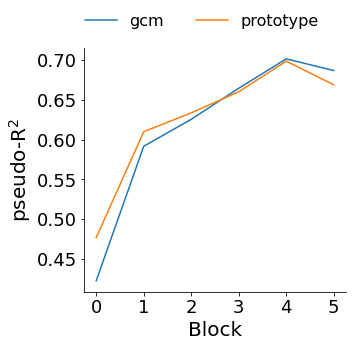

In [63]:
compare_categorisation_model_fits_learning()

# Shepards task

## conditioned on all trials until that block

In [64]:
gcm = np.array([
    [0.16186997, 0.39114824, 0.36177931, 0.42894467, 0.43433443, 0.50266742],
    [0.0081338, 0.18625959, 0.22156139, 0.33438384, 0.41774599, 0.45224335],
    [0.50880391, 0.2907726, 0.25957185, 0.29766376, 0.3543446, 0.36935798],
    [0.11863256, 0.11098464, 0.15057617, 0.21081686, 0.20398401, 0.24355848],
    [0.03621965, 0.2246609, 0.30913241, 0.37124966, 0.38080607, 0.35747023],
    [0.09553827, 0.17413197, 0.2859847, 0.28004548, 0.36330294, 0.35315806]])
prototype = np.array([
    [0.34383114, 0.4478153, 0.41600057, 0.47976877, 0.48212125, 0.53643716],
    [0.25089941, 0.36587133, 0.1090043, 0.08579408, 0.07494191, 0.06636783],
    [0.410306, 0.12590798, 0.11267552, 0.14961049, 0.21070129, 0.20136561],
    [0.20688415, 0.23422989, 0.23695783, 0.27046319, 0.24292708, 0.28534788],
    [0.17742338, 0.19825562, 0.1397969, 0.08712041, 0.03862211, -0.00332784],
    [0.81909058, 0.06550972, 0.04396268, 0.04053883, 0.03764749, 0.02272718]])


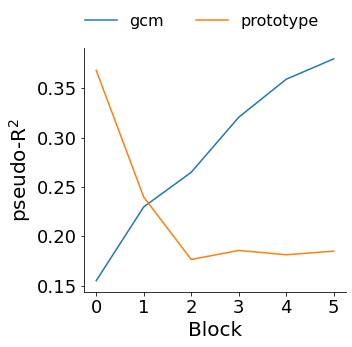

In [66]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(range(6), gcm.mean(0), label='gcm')
ax.plot(range(6), prototype.mean(0), label='prototype')
ax.set_xlabel('Block', fontsize=FONTSIZE)
ax.set_ylabel('pseudo-R$^2$', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
plt.legend(fontsize=FONTSIZE-4, frameon=False,  loc="upper center", bbox_to_anchor=(.45, 1.2), ncol=2)  # place legend outside the plot
sns.despine()
f.tight_layout()
plt.show()      
# f.savefig(f

In [ ]:
level = 5
plt.plot(range(6), gcm[level], label='gcm')
plt.plot(range(6), prototype[level], label='prototype')
plt.xlabel('Blocks')
plt.ylabel('pseudo-R$^2$')
plt.title(f'Explaining meta-learner with GCM and Prototype: Type {level+1}')
plt.legend()
plt.show()

In [66]:
gcm = np.array([
    [1.26329425e-01, 7.53730134e-01, 4.95026318e-01, 6.21367671e-01, 4.29983097e-01, 9.91213798e-01],
    [-4.29329580e-02, 7.66073556e-01, 2.75382848e-02, -4.80684339e-02, 1.29783756e-01, 3.49269936e-02],
    [5.06952983e-01, 1.08253858e-01, 9.20549513e-02, 7.95157001e-01, 3.83697542e-01, -3.24029477e-04],
    [1.16446820e-01, 9.40004241e-03, 2.14007801e-01, 5.38389054e-01, 4.74529657e-01, 5.19876512e-01],
    [2.04594723e-02, 6.25356671e-01, 6.62132206e-02, 5.59620231e-02, 2.75989412e-01, 7.32601135e-02],
    [9.46181248e-02, -1.46535352e-01, 8.01712783e-03, -3.06001395e-02, -2.93284993e-02, 2.26817009e-02]
])
prototype = np.array([
    [0.34545309, 0.71564545, 0.60868932, 0.77655103, 0.49005646, 0.99296473],
    [0.20817644, 0.72974525, 0.28909851, 0.52478099, 0.15411285, 0.10850176],
    [0.42098093, 0.26690098, 0.30225702, 0.74423232, 0.38761325, 0.30101524],
    [0.29166873, 0.48578235, 0.60630937, 0.67321888, 0.82985097, 0.32436151],
    [0.28720528, 0.24002709, 0.24413582, 0.17734872, 0.15334445, 0.1804537],
    [0.81137604, 0.39657367, 0.39325101, 0.34954973, 0.09006597, 0.37251193]
])

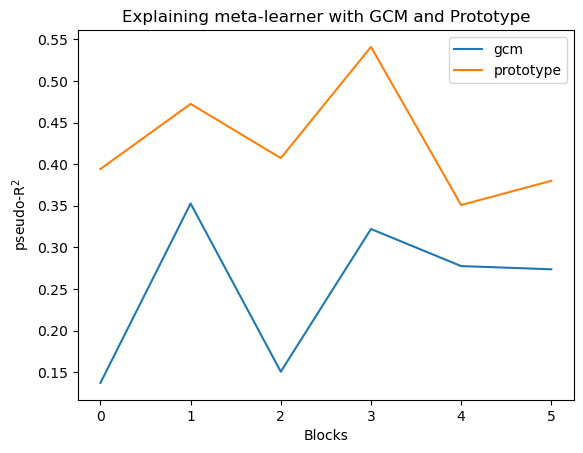

In [67]:
plt.plot(range(6), gcm.mean(0), label='gcm')
plt.plot(range(6), prototype.mean(0), label='prototype')
plt.xlabel('Blocks')
plt.ylabel('pseudo-R$^2$')
plt.title(f'Explaining meta-learner with GCM and Prototype')
plt.legend()
plt.show()

# Benchmarking

In [3]:
data = pd.read_csv('../data/human/akshay-benchmark-across-languages-train.csv')

In [4]:
data

,x1,x2,category,trial_id,x1_bd,x2_bd,d_bd,p_correct,accuracy,response
0,3.056530,1.077728,0,102,2.067129,2.067129,1.399225,0.877401,True,0
1,1.005305,6.329180,1,104,3.667243,3.667243,3.764548,0.996471,True,1
2,3.604103,0.799103,0,195,2.201603,2.201603,1.983435,0.948960,True,0
3,1.986139,3.860838,1,47,2.923489,2.923489,1.325612,0.863088,True,1
4,6.100023,2.424143,0,55,4.262083,4.262083,2.599240,0.979735,True,0
...,...,...,...,...,...,...,...,...,...,...
100,5.811899,5.179035,0,41,5.495467,5.495467,0.447503,0.488933,True,0
101,2.935887,6.201328,1,20,4.568608,4.568608,2.309016,0.968681,True,1
102,4.980716,2.692678,0,206,3.836697,3.836697,1.617887,0.911684,True,0
103,3.491481,0.911989,0,134,2.201735,2.201735,1.823976,0.935169,True,0


In [18]:
data = pd.read_csv('../data/human/akshay-benchmark-across-languages-transfer.csv')

In [19]:
data

,x1,x2,category,trial_id,x1_bd,x2_bd,d_bd,p_correct,accuracy,response
0,3.170369,1.438160,0,57,2.304264,2.304264,1.224857,0.840751,True,0
1,0.968855,4.235993,1,189,2.602424,2.602424,2.310215,0.968737,True,1
2,0.912473,4.175623,1,111,2.544048,2.544048,2.307395,0.968605,True,1
3,0.848838,4.124432,1,156,2.486635,2.486635,2.316194,0.969016,True,1
4,1.046416,3.840907,1,39,2.443662,2.443662,1.976004,0.948388,True,1
...,...,...,...,...,...,...,...,...,...,...
100,6.039377,5.179497,0,193,5.609437,5.609437,0.608027,0.598296,False,1
101,5.596627,4.632280,0,17,5.114454,5.114454,0.681896,0.640429,False,1
102,4.157239,3.170755,0,119,3.663997,3.663997,0.697549,0.648773,True,0
103,4.291868,3.306554,0,186,3.799211,3.799211,0.696722,0.648338,True,0


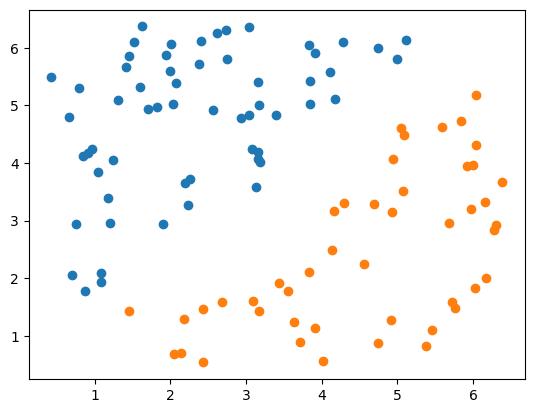

In [20]:
plt.scatter(data[data.category==1][['x1']],data[data.category==1][['x2']])
plt.scatter(data[data.category==0][['x1']],data[data.category==0][['x2']])

In [15]:
data = pd.read_csv('../data/human/akshay-benchmark-across-languages-params.csv')

In [16]:
data

,p_name,val
0,c,1.677932
1,w,0.466102
2,bias,0.366413


In [6]:
data = pd.read_csv('../data/claude_generated_tasks_paramsNA_dim6_data500_tasks1269_pversion5_stage1.csv')

In [7]:
data

,Unnamed: 0,Unnamed: 0.1,input,target,trial_id,task_id
0,0,0,"[2.0, 4.0, 7.0, 3.0, 5.0, 1.0]",birds,0,1.0
1,1,1,"[5.0, 2.0, 3.0, 1.0, 4.0, 7.0]",mammals,1,1.0
2,2,2,"[1.0, 3.0, 5.0, 2.0, 6.0, 4.0]",birds,2,1.0
3,3,3,"[7.0, 1.0, 4.0, 6.0, 2.0, 3.0]",mammals,3,1.0
4,4,4,"[3.0, 5.0, 2.0, 4.0, 1.0, 6.0]",birds,4,1.0
...,...,...,...,...,...,...
173112,173112,25379,"[10.0, 2.0, 2.0, 0.0, 6.0, 8.0]",truck,245,1268.0
173113,173113,25380,"[4.0, 4.0, 5.0, 1.0, 4.0, 2.0]",sedan,246,1268.0
173114,173114,25381,"[8.0, 4.0, 2.0, 1.0, 6.0, 8.0]",truck,247,1268.0
173115,173115,25382,"[4.0, 2.0, 5.0, 1.0, 4.0, 2.0]",sedan,248,1268.0


In [8]:
data = data.groupby(['task_id']).filter(lambda x: len(x['target'].unique()) == 2) # check if data has only two values for target in each task
data.input = data['input'].apply(lambda x: np.array(eval(x)))

In [9]:
data

,Unnamed: 0,Unnamed: 0.1,input,target,trial_id,task_id
0,0,0,"[2.0, 4.0, 7.0, 3.0, 5.0, 1.0]",birds,0,1.0
1,1,1,"[5.0, 2.0, 3.0, 1.0, 4.0, 7.0]",mammals,1,1.0
2,2,2,"[1.0, 3.0, 5.0, 2.0, 6.0, 4.0]",birds,2,1.0
3,3,3,"[7.0, 1.0, 4.0, 6.0, 2.0, 3.0]",mammals,3,1.0
4,4,4,"[3.0, 5.0, 2.0, 4.0, 1.0, 6.0]",birds,4,1.0
...,...,...,...,...,...,...
173112,173112,25379,"[10.0, 2.0, 2.0, 0.0, 6.0, 8.0]",truck,245,1268.0
173113,173113,25380,"[4.0, 4.0, 5.0, 1.0, 4.0, 2.0]",sedan,246,1268.0
173114,173114,25381,"[8.0, 4.0, 2.0, 1.0, 6.0, 8.0]",truck,247,1268.0
173115,173115,25382,"[4.0, 2.0, 5.0, 1.0, 4.0, 2.0]",sedan,248,1268.0


In [4]:
data = pd.read_csv('../baselines/exp2.csv')

In [7]:
data.trial.max()*np.log(0.5)

-137.93628893142912

In [10]:
data

,Unnamed: 0,id,trial,feature1,feature2,feature3,feature4,correct_choice,choice,task,reward,participant,amnesic,is_training
0,0,C1,0,0,1,0,1,1,1,0,1,0,False,True
1,1,C1,1,1,1,0,0,0,0,0,1,0,False,True
2,2,C1,2,0,0,1,1,1,0,0,0,0,False,True
3,3,C1,3,0,1,1,0,0,0,0,1,0,False,True
4,4,C1,4,1,0,0,0,0,1,0,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,A9,195,0,0,1,0,1,1,0,1,24,True,True
4996,4996,A9,196,1,0,1,0,1,1,0,1,24,True,True
4997,4997,A9,197,0,1,1,1,1,0,0,0,24,True,True
4998,4998,A9,198,1,1,0,0,0,0,0,1,24,True,True


In [11]:
1- (-232.78065227140178/(data.trial.max()*np.log(0.5)))

0.12315537167924384

In [19]:
1-232.78065227140178/(-data.trial.max()*np.log(0.5))

0.12315537167924384

In [21]:
len(data)

105

In [13]:
data[data.category==1][['x1','x2']], data[data.category==0][['x1','x2']].mean()

(x1    2.292030
 x2    4.593165
 dtype: float64,
 x1    4.766967
 x2    2.243946
 dtype: float64)

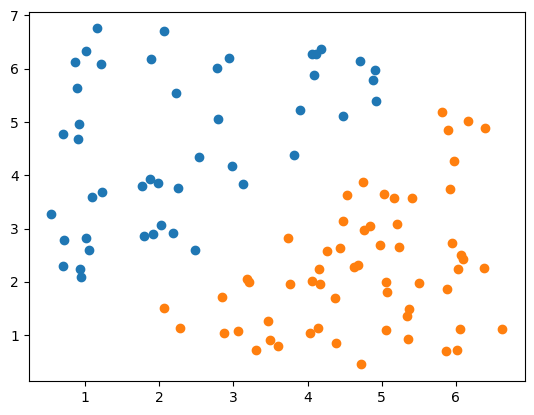

In [17]:
plt.scatter(data[data.category==1][['x1']],data[data.category==1][['x2']])
plt.scatter(data[data.category==0][['x1']],data[data.category==0][['x2']])